# importing dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
(len(df[df['Class'] == 0]), len(df[df['Class'] == 1]))

(284315, 492)

In [6]:
target = 'Class'
columns = [i for i in df.columns.to_list() if i != target]

In [7]:
import numpy as np

In [8]:
X = df[columns]
y = df[target]

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([284315,    492]))

# undersampling with random undersampling

In [10]:
from imblearn.under_sampling import RandomUnderSampler 

In [11]:
rus = RandomUnderSampler(random_state=69)
X_resampled, y_resampled = rus.fit_resample(X,y)

In [12]:
np.unique(y_resampled, return_counts=True)

(array([0, 1]), array([492, 492]))

# training the model

In [13]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.ensemble import RandomForestClassifier

In [15]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

In [16]:
model = pipeline.fit(X_resampled, y_resampled)

# evaluating the model
### i know it is useless to evaluate on training set but this is just the training notebook

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [33]:
y_hat = model.predict(X)

In [34]:
accuracy_score(y, y_hat)

0.9699691369945261

In [35]:
M = confusion_matrix(y, y_hat)
M

array([[275762,   8553],
       [     0,    492]])

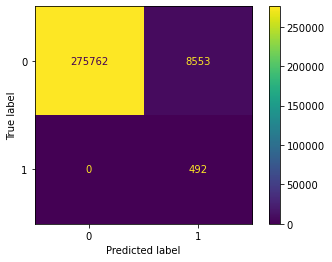

In [37]:
plot_confusion_matrix(model, X, y)
plt.show()

# saving the trained model

In [39]:
import pickle
import os.path

In [43]:
with open(os.path.join("models", "undersampled-rf.pkl"), "wb") as f:
    pickle.dump(model, f)

## loading and testing model

In [44]:
with open(os.path.join("models", "undersampled-rf.pkl"), "rb") as f:
    loaded_model = pickle.load(f)

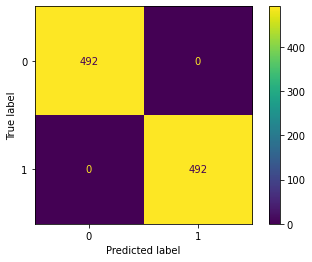

In [46]:
plot_confusion_matrix(loaded_model, X_resampled, y_resampled)
plt.show()